In [1]:
%matplotlib notebook
import pylab
pylab.rcParams['figure.figsize'] = (10., 10.)

from sklearn import linear_model

import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 100
D = 100
sigma = 0.2

np.random.seed(134)
X = np.random.randn(N, D)
Xtest = np.random.randn(N, D)
y = X[:, 0] + np.random.randn(N) * sigma
ytest = Xtest[:, 0] + np.random.randn(N) * sigma

In [3]:
regr = linear_model.LinearRegression()
ridge = linear_model.Ridge(fit_intercept=False, alpha=8)
lasso = linear_model.Lasso(alpha=0.04)

models = {'LM': regr, 'ridge': ridge, 'lasso': lasso}
train_errors = {'LM': [], 'ridge': [], 'lasso': []}
test_errors = {'LM': [], 'ridge': [], 'lasso': []}
weights = {'LM': None, 'ridge': None, 'lasso': None}

for k in weights.keys():
    weights[k] = np.zeros([D, D])

for i in xrange(D):
    for m in ['LM', 'ridge', 'lasso']:
        model = models[m]
        model.fit(X[:, : i + 1], y)
        yhat = model.predict(X[:, :i+1])
        ytesthat = model.predict(Xtest[:, :i+1])
        train_errors[m].append(np.mean((y - yhat)**2))
        test_errors[m].append(np.mean((ytest - ytesthat)**2))
        weights[m][i, : i +1] = model.coef_

<IPython.core.display.Javascript object>


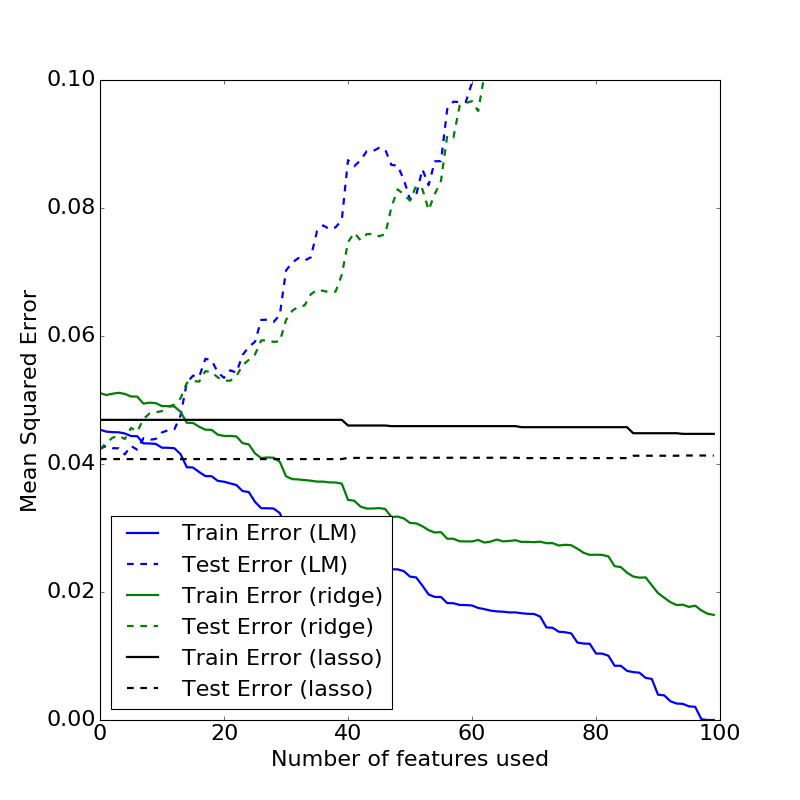

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_ylim(0, 0.1)
ax.tick_params(axis='both', labelsize='20')
ax.set_xlabel('Number of features used', fontsize=20)
ax.set_ylabel('Mean Squared Error', fontsize=20)
for k, c in zip(['LM', 'ridge', 'lasso'], ['b', 'g', 'k']):
    ax.plot(train_errors[k], c=c, lw=2, label='Train Error (' + k + ')')
    ax.plot(test_errors[k], c=c, ls='--', lw=2, label='Test Error (' + k + ')')
ax.legend(loc='lower left', fontsize=20)

<IPython.core.display.Javascript object>


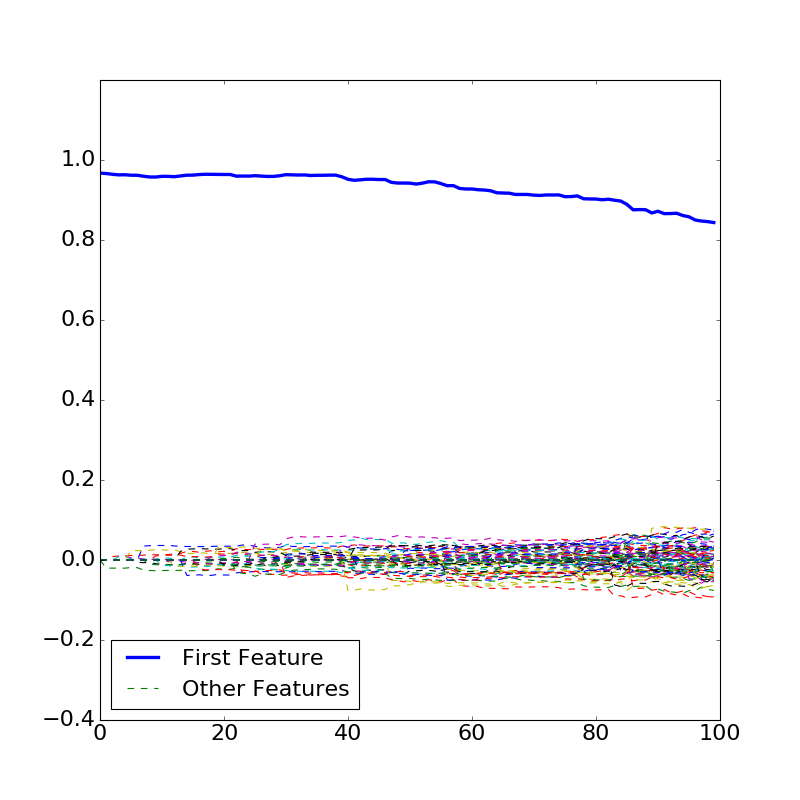

In [9]:
def plotWeights(model):
    fig2 = plt.figure()
    ax2 = fig2.add_subplot(1, 1, 1)
    ax2.tick_params(axis='both', labelsize=20)
    ax2.set_xlim(0, 100)
    ax2.set_ylim(-0.4, 1.2)
    for i in range(D):
        ls = '-' if i == 0 else '--'
        lw = 3 if i == 0 else 1
        if i==0:
            label = 'First Feature'
        elif i == 1:
            label = 'Other Features'
        else:
            label=None
                
        ax2.plot(weights[model][:, i], ls=ls, lw=lw, label=label)
    ax2.legend(fontsize=20, loc='lower left')
# plotWeights('LM')
plotWeights('ridge')
#plotWeights('lasso')